# 4.10 Task Part 1 (notebook 6)

## Table of Contents
### Chang 'prices_total' column to 'order_total'
### Dropping 'income_range' and replacing it with 'income_flag' with 'above average' and 'below average' income. (This was done in a previous notebook, but does not seem to have saved properly. So doing it again here.)
### Horizontal bar chart for percentage of orders by department and income level
### Horizontal bar chart for orders in each department by Region, normalized for region sizes

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path

path = r'C:\Users\Karen\Documents\Personal\Data Analytics\Career Foundry\Achievement 4\Instacart Basket Analysis'

In [3]:
# Importing data set

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
# Removing the limit to columns and rows displayed so I can see all the rows and columns going forward

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
# Checking imported data frame

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order_price,spending_flag,median_days_since_prior_order,regularity_flag,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge,Region,exclusion_flag,income_range,age_range,department,prices_total
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Low,Young,beverages,31.6
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Low,Young,beverages,35.4
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Low,Young,beverages,28.2
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Low,Young,beverages,26.0
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Low,Young,beverages,57.0


In [6]:
# Changing 'prices_total' column to 'order_total'

df.rename(columns = {'prices_total' : 'order_total'}, inplace = True)

In [7]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order_price,spending_flag,median_days_since_prior_order,regularity_flag,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge,Region,exclusion_flag,income_range,age_range,department,order_total
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Low,Young,beverages,31.6
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Low,Young,beverages,35.4
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Low,Young,beverages,28.2
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Low,Young,beverages,26.0
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Low,Young,beverages,57.0


In [12]:
# I think there was a problem with a previous notebook, so I'm re-dropping the 'income_range' column and 
# changing it to an 'income_flag' column with 'Above Average' and 'Below Average' income flags.

# Remove the current 'income_range' column

df.drop(columns=['income_range'], inplace=True)

In [13]:
# Checking column drop

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order_price,spending_flag,median_days_since_prior_order,regularity_flag,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge,Region,exclusion_flag,age_range,department,order_total
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,31.6
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,35.4
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,28.2
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,26.0
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,57.0


In [14]:
df.shape

(30964564, 36)

In [15]:
# Create a flag based on above and below average incomes

# Calculate mean income

df['income'].mean()

99675.86510754681

In [16]:
df.loc[df ['income'] <= 99676, 'income_flag'] = 'below average'

In [17]:
df.loc[df ['income'] > 99676, 'income_flag'] = 'above average'

In [18]:
df['income_flag'].value_counts(dropna = False)

income_flag
below average    16624881
above average    14339683
Name: count, dtype: int64

In [19]:
# New column checks

16624881+14339683

30964564

In [20]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order_price,spending_flag,median_days_since_prior_order,regularity_flag,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge,Region,exclusion_flag,age_range,department,order_total,income_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,31.6,below average
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,35.4,below average
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,28.2,below average
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,26.0,below average
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No,Young,beverages,57.0,below average


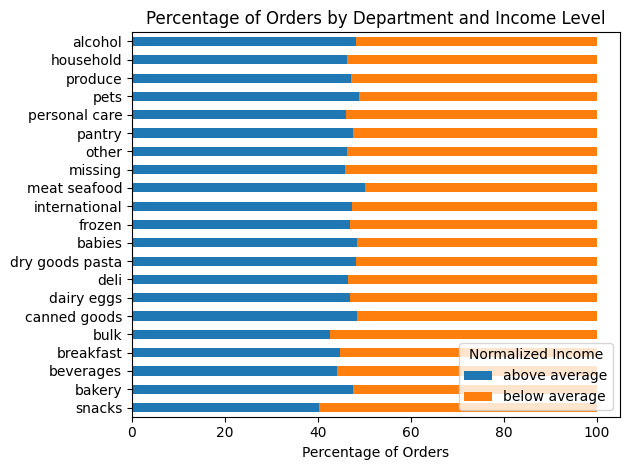

In [34]:
# Horizontal bar chart for percentage of orders by department and income level

# Group by 'department' and 'income_flag', and count the occurrences
department_income_counts = df.groupby(['department', 'income_flag']).size().unstack()

# Normalize the data along the horizontal axis (income_flag)
normalized_data = department_income_counts.div(department_income_counts.sum(axis=1), axis=0)

# Convert the proportions to percentages
percentage_data = normalized_data * 100

# Sort the data by total orders in descending order
total_orders = percentage_data.sum(axis=1)
sorted_data = percentage_data.loc[total_orders.sort_values(ascending=False).index]

# Plot the stacked horizontal bar chart with normalized data
ax = sorted_data.plot.barh(stacked=True)

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

# Add labels and a title
plt.xlabel('Percentage of Orders')  # Update the label to indicate it's percentages
plt.ylabel('')
plt.title('Percentage of Orders by Department and Income Level')

# Add a legend with a title
plt.legend(title='Normalized Income', loc='lower right')

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_department_and_income.png'), bbox_inches='tight', pad_inches=0.1)

In [33]:
percentage_data

income_flag,above average,below average
department,,
alcohol,48.143846,51.856154
babies,48.403234,51.596766
bakery,47.526115,52.473885
beverages,44.192098,55.807902
breakfast,44.786763,55.213237
bulk,42.689307,57.310693
canned goods,48.379269,51.620731
dairy eggs,46.934433,53.065567
deli,46.443037,53.556963


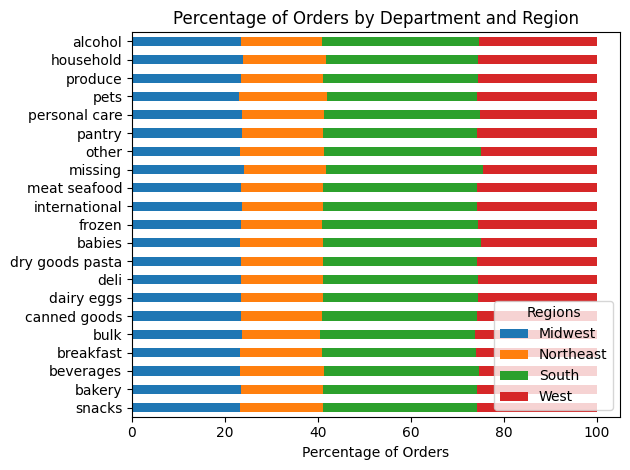

In [37]:
# Make a horizontal bar chart for orders in each department by Region, normalized for region sizes.

# Group by 'department' and 'Region', and count the occurrences
department_region_counts = df.groupby(['department', 'Region']).size().unstack()

# Normalize the data along the horizontal axis (Region)
normalized_data1 = department_region_counts.div(department_region_counts.sum(axis=1), axis=0)

# Convert the proportions to percentages
percentage_data1 = normalized_data1 * 100

# Sort the data by total orders in descending order
total_orders1 = percentage_data1.sum(axis=1)
sorted_data1 = percentage_data1.loc[total_orders.sort_values(ascending=False).index]

# Plot the stacked horizontal bar chart with normalized data
ax = sorted_data1.plot.barh(stacked=True)

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

# Add labels and a title
plt.xlabel('Percentage of Orders') 
plt.ylabel('')
plt.title('Percentage of Orders by Department and Region')

# Add a legend with a title
plt.legend(title='Regions', loc='lower right')

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_department_and_region2.png'), bbox_inches='tight', pad_inches=0.1)


In [38]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [39]:
percentage_data1

Region,Midwest,Northeast,South,West
department,,,,
alcohol,23.538482,17.297600,33.750959,25.412959
babies,23.329158,17.717694,33.994571,24.958576
bakery,23.353539,17.781497,33.155845,25.709119
beverages,23.289349,17.999488,33.415711,25.295453
breakfast,23.277186,17.575315,33.267049,25.880450
bulk,23.703327,16.737915,33.422020,26.136737
canned goods,23.462612,17.482516,33.343214,25.711657
dairy eggs,23.419884,17.666290,33.280963,25.632864
deli,23.356850,17.771663,33.234579,25.636908


### The percentage of orders in each department by region seems to closely follow the total percentage of customers in each region. 